In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import pandas as pd
import math as mt
import ROOT
import os
import random

Welcome to JupyROOT 6.20/00


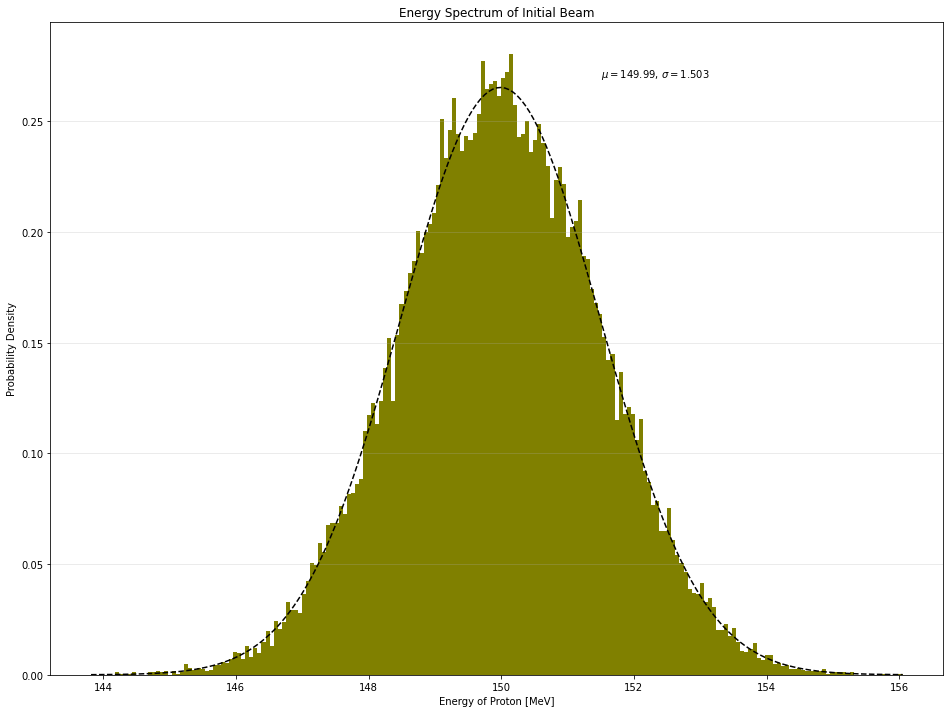

<Figure size 1152x864 with 0 Axes>

In [18]:
initial_beam = np.genfromtxt('/home/fardous/Desktop/Modified_Code/Data/InitialBeam.csv', delimiter=',')
initial_energy = initial_beam[:,5]
mean  =  np.mean(initial_energy)
sigma =  np.std(initial_energy)
n, bins, patches = plt.hist(initial_energy, 200, density=1, color='olive')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mean))**2))

plt.title('Energy Spectrum of Initial Beam')
plt.xlabel('Energy of Proton [MeV]')
plt.ylabel('Probability Density')
plt.plot(bins, y, '--', color='black')
plt.rcParams['axes.facecolor'] = 'beige'
plt.grid(axis='y', alpha=0.3)
info = '$\mu=$'+np.str(round(mean,2))+', '+'$\sigma=$'+np.str(round(sigma,3))
plt.text(151.5,.27,info)
plt.show()
plt.savefig('Initial_Energy_Spectrum_150MeV_200mm.png', dpi=100)

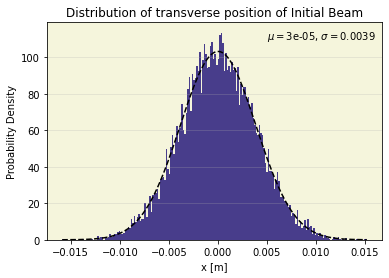

In [3]:
initial_x = initial_beam[:,0]
mean  =  np.mean(initial_x)
sigma =  np.std(initial_x)
n, bins, patches = plt.hist(initial_x, 200, density=1, color='darkslateblue')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mean))**2))

plt.title('Distribution of transverse position of Initial Beam')
plt.xlabel('x [m]')
plt.ylabel('Probability Density')
plt.plot(bins, y, '--', color='black')
plt.rcParams['axes.facecolor'] = 'beige'
plt.grid(axis='y', alpha=0.3)
info = '$\mu=$'+np.str(round(mean,5))+', '+'$\sigma=$'+np.str(round(sigma,4))
plt.text(.005,110,info)
plt.show()

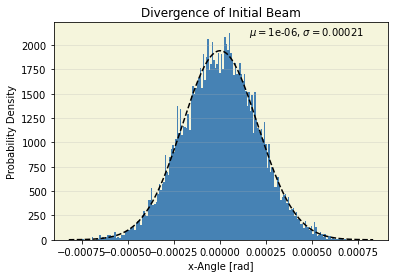

In [4]:
initial_x_angle = initial_beam[:,1]
mean  =  np.mean(initial_x_angle)
sigma =  np.std(initial_x_angle)
n, bins, patches = plt.hist(initial_x_angle, 200, density=1,  color='steelblue')

y = ((1 / (np.sqrt(2 * np.pi) * sigma)) *
     np.exp(-0.5 * (1 / sigma * (bins - mean))**2))

plt.title('Divergence of Initial Beam')
plt.xlabel('x-Angle [rad]')
plt.ylabel('Probability Density')
plt.plot(bins, y, '--', color='black')
plt.rcParams['axes.facecolor'] = 'beige'
plt.grid(axis='y', alpha=0.3)
info = '$\mu=$'+np.str(round(mean,7))+', '+'$\sigma=$'+np.str(round(sigma,5))
plt.text(.00016,2100,info)
plt.show()

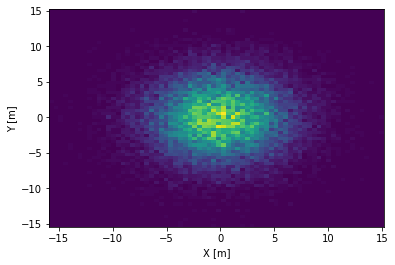

In [6]:
initial_x_pos = initial_beam[:,0]*1000
initial_y_pos = initial_beam[:,2]*1000

plt.hist2d(initial_x_pos, initial_y_pos, bins =[70, 70]) 
plt.xlabel('X [mm]')  
plt.ylabel('Y [mm]')  

# show plot   
plt.show()

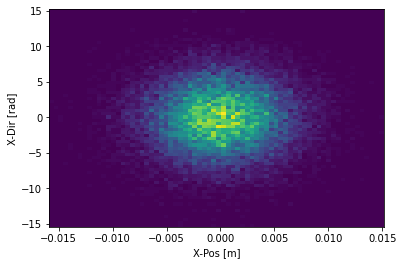

In [7]:
initial_x_pos = initial_beam[:,0]
initial_x_dir = initial_beam[:,1]

plt.hist2d(initial_x_pos, initial_y_pos, bins =[70, 70]) 
plt.xlabel('X-Pos [m]')  
plt.ylabel('X-Dir [rad]')  

# show plot   
plt.show()

In [2]:
simulated_beam  = np.genfromtxt('/home/fardous/Desktop/Proton_Beam_Therapy/Data/ProtonBeamTherapyDataFile.csv', delimiter=',')
number_of_point = np.shape(simulated_beam)[0]
print(number_of_point)

81397


In [5]:
ini_all_energy       = []
ini_proton_energy    = []
ini_neutron_energy   = []
ini_electron_energy  = []
ini_photon_energy    = []

for row in range(number_of_point):
    eventID               =simulated_beam[row][0]
    trackID               =simulated_beam[row][1]
    particleID            =simulated_beam[row][2]
    parentID              =simulated_beam[row][3]
    pre_X                 =simulated_beam[row][4] 
    pre_Y                 =simulated_beam[row][5] 
    pre_Z                 =simulated_beam[row][6]
    post_X                =simulated_beam[row][7]
    post_Y                =simulated_beam[row][8]
    post_Z                =simulated_beam[row][9]
    pre_Ang_X             =simulated_beam[row][10]
    pre_Ang_Y             =simulated_beam[row][11]
    pre_z_direction       =simulated_beam[row][12]
    post_Ang_X            =simulated_beam[row][13]
    post_Ang_Y            =simulated_beam[row][14]
    post_z_direction      =simulated_beam[row][15]
    energy_Deposit        =simulated_beam[row][16]
    secondery_Energy      =simulated_beam[row][17]
    pre_KE                =simulated_beam[row][18]
    post_KE               =simulated_beam[row][19]
        
    if(pre_Z==0):
        ini_all_energy.append(pre_KE)
        if  (particleID == 1):
            ini_proton_energy.append(pre_KE)
        elif(particleID == 5):
            ini_neutron_energy.append(pre_KE)
        elif(particleID == 2):
            print("Electron")
            ini_electron_energy.append(pre_KE)
        elif(particleID == 3):
            ini_photon_energy.append(pre_KE)
            

Electron
Electron
Electron
Electron
Electron
Electron
Electron


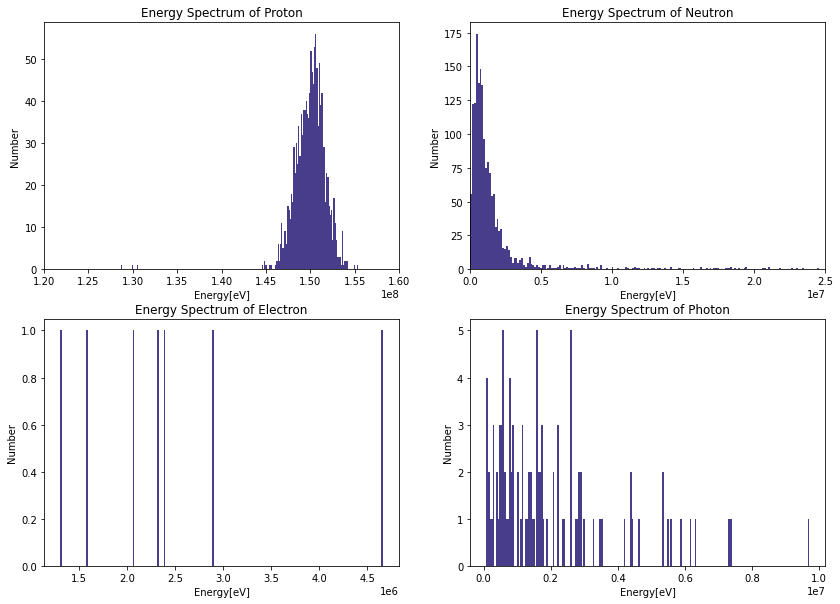

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 10
plt.rcParams['axes.facecolor'] = 'white'
plt.subplot(2, 2, 1)
plt.hist(ini_proton_energy,    1000, color='darkslateblue')
plt.title('Energy Spectrum of Proton')
plt.xlabel('Energy[eV]')
plt.ylabel('Number')
plt.xlim(1.2e8, 1.6e8)
plt.subplot(2, 2, 2)
plt.hist(ini_neutron_energy,   1000, color='darkslateblue')
plt.title('Energy Spectrum of Neutron') 
plt.xlabel('Energy[eV]')
plt.ylabel('Number')
plt.xlim(0, 0.25e8)
plt.subplot(2, 2, 3)
plt.hist(ini_electron_energy,  200, color='darkslateblue')
plt.title('Energy Spectrum of Electron')
plt.xlabel('Energy[eV]')
plt.ylabel('Number')

plt.subplot(2, 2, 4)
plt.hist(ini_photon_energy,    200, color='darkslateblue')
plt.title('Energy Spectrum of Photon')
plt.xlabel('Energy[eV]')
plt.ylabel('Number')

plt.show()

In [11]:
target_all_energy       = []
target_proton_energy    = []
target_neutron_energy   = []
target_electron_energy  = []
target_photon_energy    = []

all_x = []
all_y = []
all_z = []

proton_x = []
proton_y = []
proton_z = []

neutron_x = []
neutron_y = []
neutron_z = []

electron_x = []
electron_y = []
electron_z = []

photon_x = []
photon_y = []
photon_z = []

for row in range(number_of_point):
    eventID               =simulated_beam[row][0]
    trackID               =simulated_beam[row][1]
    particleID            =simulated_beam[row][2]
    parentID              =simulated_beam[row][3]
    pre_X                 =simulated_beam[row][4]*1000 
    pre_Y                 =simulated_beam[row][5]*1000 
    pre_Z                 =simulated_beam[row][6]
    post_X                =simulated_beam[row][7]*1000
    post_Y                =simulated_beam[row][8]*1000
    post_Z                =simulated_beam[row][9]
    pre_Ang_X             =simulated_beam[row][10]
    pre_Ang_Y             =simulated_beam[row][11]
    pre_z_direction       =simulated_beam[row][12]
    post_Ang_X            =simulated_beam[row][13]
    post_Ang_Y            =simulated_beam[row][14]
    post_z_direction      =simulated_beam[row][15]
    energy_Deposit        =simulated_beam[row][16]
    secondery_Energy      =simulated_beam[row][17]
    pre_KE                =simulated_beam[row][18]
    post_KE               =simulated_beam[row][19]
    
    if(pre_Z>=880):
        target_all_energy.append(energy_Deposit)
        all_x.append(random.uniform(pre_X, post_X))
        all_y.append(random.uniform(pre_Y, post_Y))
        all_z.append(random.uniform(pre_Z, post_Z))
        
        if(particleID == 1):
            target_proton_energy.append(energy_Deposit)
            proton_x.append(random.uniform(pre_X, post_X))
            proton_y.append(random.uniform(pre_Y, post_Y))
            proton_z.append(random.uniform(pre_Z, post_Z))
            
        elif(particleID == 5):
            target_neutron_energy.append(energy_Deposit)
            neutron_x.append(random.uniform(pre_X, post_X))
            neutron_y.append(random.uniform(pre_Y, post_Y))
            neutron_z.append(random.uniform(pre_Z, post_Z))
        
        elif(particleID == 2):
            target_electron_energy.append(energy_Deposit)
            electron_x.append(random.uniform(pre_X, post_X))
            electron_y.append(random.uniform(pre_Y, post_Y))
            electron_z.append(random.uniform(pre_Z, post_Z))
        
        elif(particleID == 3):
            target_photon_energy.append(energy_Deposit)
            photon_x.append(random.uniform(pre_X, post_X))
            photon_y.append(random.uniform(pre_Y, post_Y))
            photon_z.append(random.uniform(pre_Z, post_Z))
        
            
        

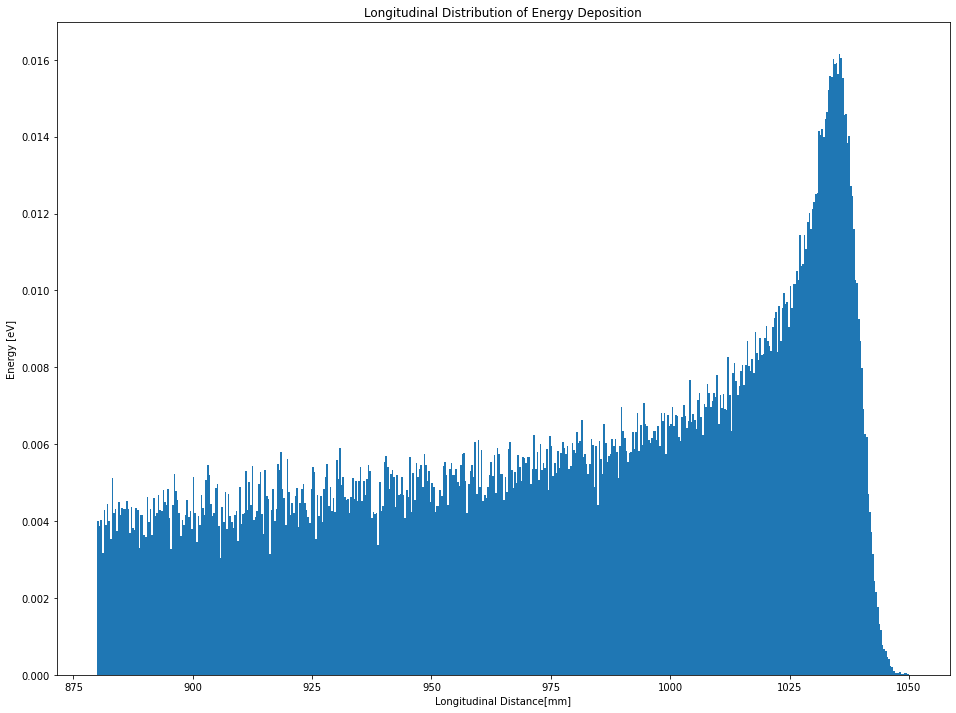

In [20]:
from pylab import rcParams
inline_rc = dict(plt.rcParams)
rcParams['figure.figsize'] = 16, 12



n, bins, patches = plt.hist(proton_z, bins=510, weights=target_proton_energy, range=[880, 1050], density =1)

plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')


plt.show()

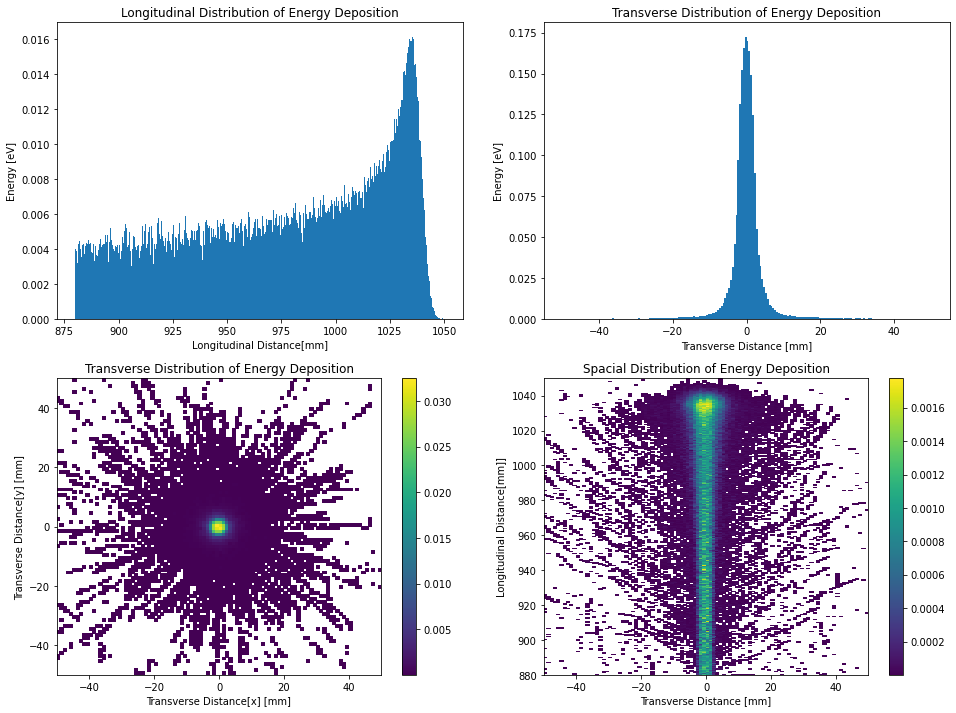

In [13]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 12



plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(proton_z, bins=510, weights=target_proton_energy, range=[880, 1050], density =1,)
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(proton_x, bins=200, weights=target_proton_energy, range=[-50, 50], density =1,)
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(proton_x, proton_y, bins=[100,100], weights=target_proton_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50,50],[-50,50]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[y] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(proton_x, proton_z, bins=[100,400], weights=target_proton_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50,50], [880, 1050]])
plt.title('Spacial Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.colorbar()
plt.savefig('150MeV_Proton_Energy_Distribution.png', dpi=400)
plt.show()




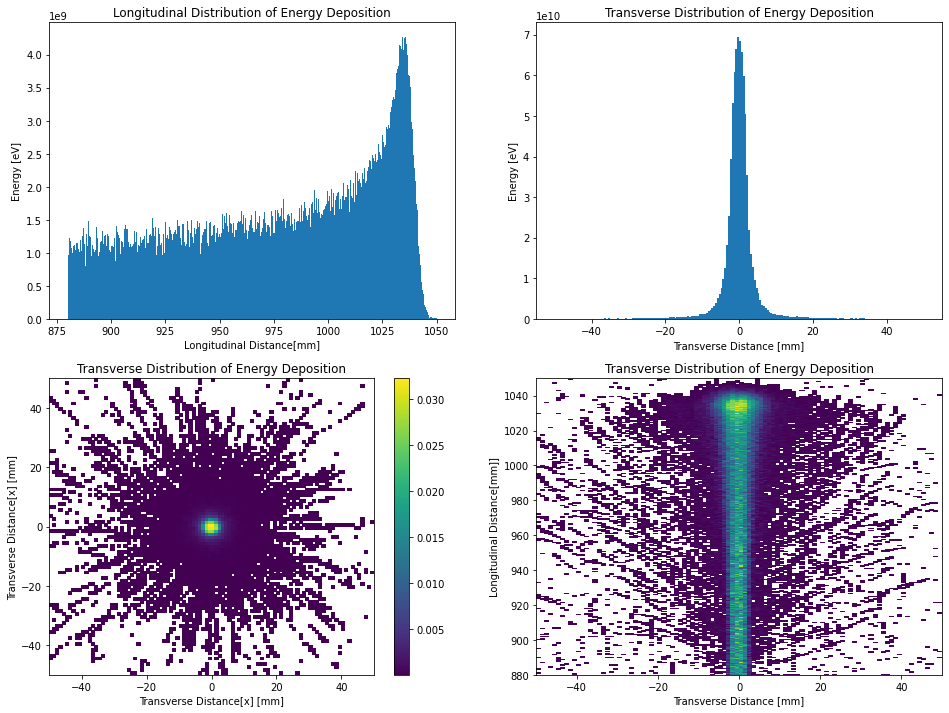

In [17]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(all_z, bins=510, weights=target_all_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(all_x, bins=200, weights=target_all_energy, range=[-50, 50])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(all_x, all_y, bins=[100,100], weights=target_all_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50, 50],[-50, 50]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(all_x, all_z, bins=[100,400], weights=target_all_energy, density =1, 
           cmin=10e-7, cmax=1, range=[[-50, 50], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()

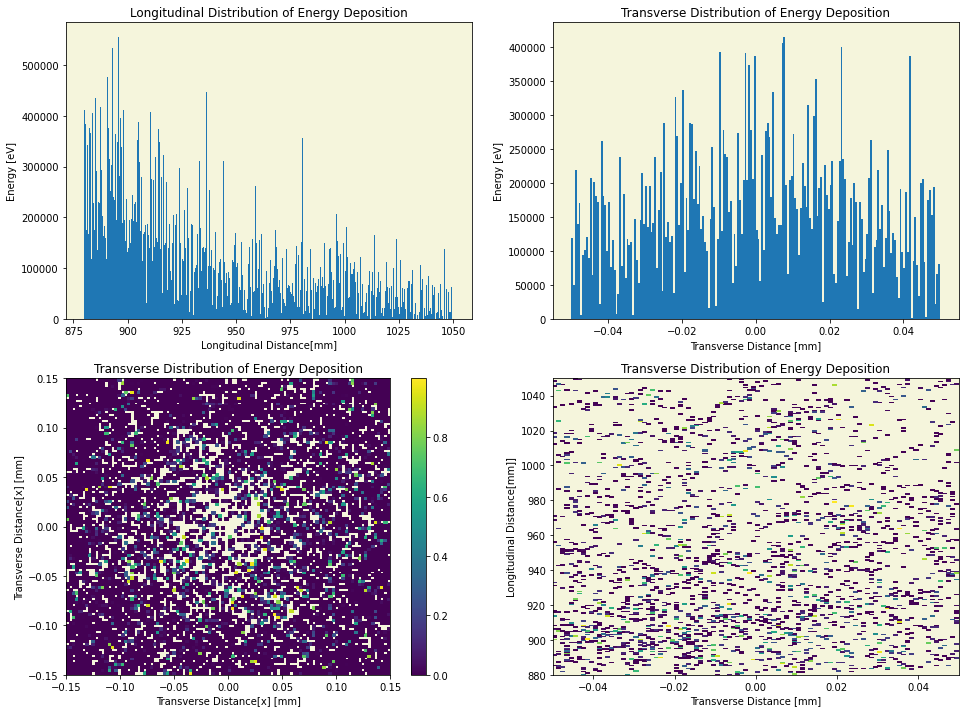

In [50]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(neutron_z, bins=510, weights=target_neutron_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(neutron_x, bins=200, weights=target_neutron_energy, range=[-.05, .05])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(neutron_x, neutron_y, bins=[100,100], weights=target_neutron_energy, density =1, 
           cmin=0, cmax=1, range=[[-.150,.150],[-.150,.150]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(neutron_x, neutron_z, bins=[100,400], weights=target_neutron_energy, density =1, 
           cmin=10e-5, cmax=1, range=[[-.050,.050], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()

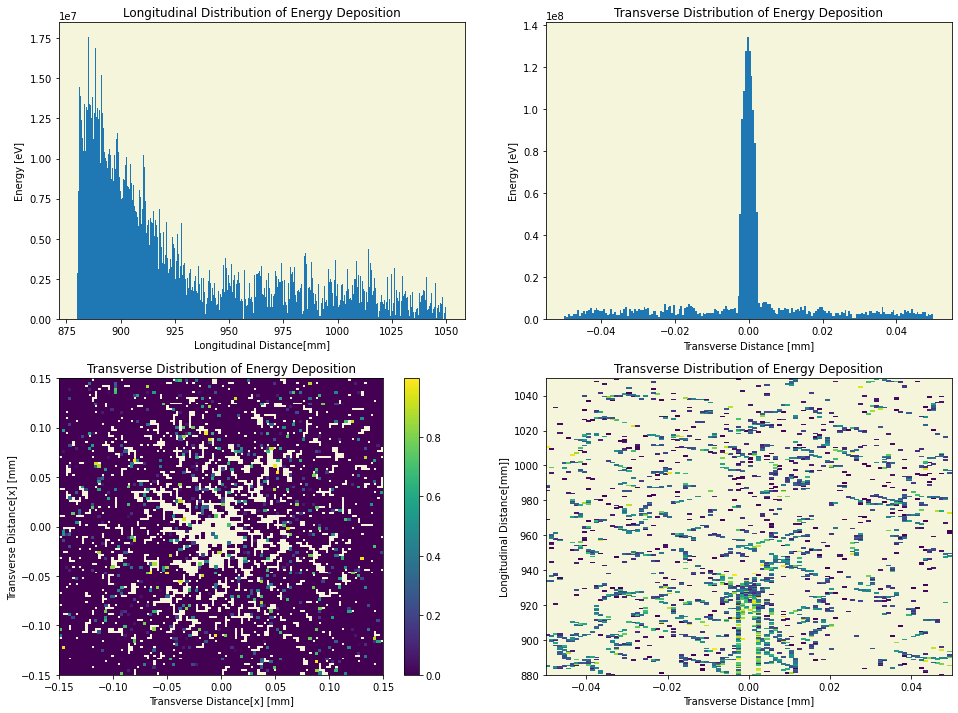

In [51]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(electron_z, bins=510, weights=target_electron_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(electron_x, bins=200, weights=target_electron_energy, range=[-.05, .05])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(electron_x, electron_y, bins=[100,100], weights=target_electron_energy, density =1, 
           cmin=0, cmax=1, range=[[-.150,.150],[-.150,.150]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(electron_x, electron_z, bins=[100,400], weights=target_electron_energy, density =1, 
           cmin=10e-5, cmax=1, range=[[-.050,.050], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()

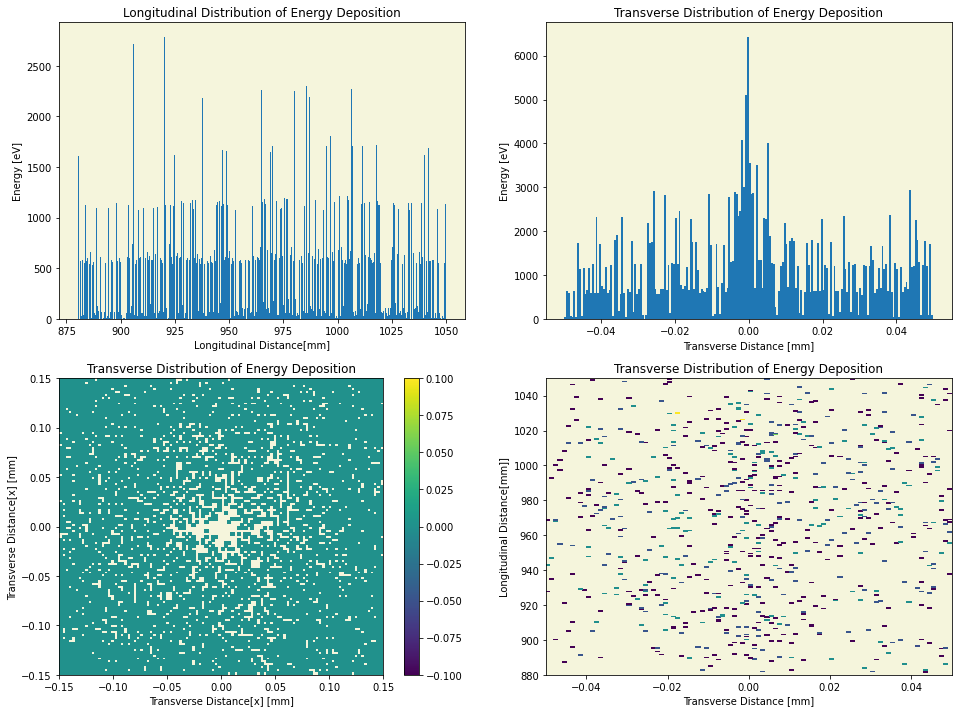

In [54]:
rcParams['figure.figsize'] = 16, 12

plt.subplot(2, 2, 1)
n, bins, patches = plt.hist(photon_z, bins=510, weights=target_photon_energy, range=[880, 1050])
plt.title('Longitudinal Distribution of Energy Deposition')
plt.xlabel('Longitudinal Distance[mm]')
plt.ylabel('Energy [eV]')

#plt.xlim(1.2e8, 1.6e8)

plt.subplot(2, 2, 2)
plt.hist(photon_x, bins=200, weights=target_photon_energy, range=[-.05, .05])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Energy [eV]')


plt.subplot(2, 2, 3)
plt.hist2d(photon_x, photon_y, bins=[100,100], weights=target_photon_energy, density =1, 
           cmin=0, cmax=1, range=[[-.150,.150],[-.150,.150]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance[x] [mm]')
plt.ylabel('Transverse Distance[x] [mm]')
plt.colorbar()


plt.subplot(2, 2, 4)
plt.hist2d(photon_x, photon_z, bins=[100,400], weights=target_photon_energy, density =1, 
           cmin=10e-5, cmax=1, range=[[-.050,.050], [880, 1050]])
plt.title('Transverse Distribution of Energy Deposition')
plt.xlabel('Transverse Distance [mm]')
plt.ylabel('Longitudinal Distance[mm]]')
plt.savefig('150MeV_Proton_Spacial_Energy_Distribution.png', dpi=300)
plt.show()